In [3]:
from brainlit.utils.session import NeuroglancerSession
from brainlit.utils.swc import graph_to_paths
import napari

import csv
import pandas as pd

import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import csv
import pandas as pd
import cv2
from cloudvolume import CloudVolume, view
from tifffile import imsave
from brainlit.utils.session import NeuroglancerSession
import pickle as pkl
import napari

/Users/johnduva/opt/anaconda3/envs/neuroData3_7/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]


## Get brain's cell centers, segIDs, bounding boxes, and subvolume data

In [ ]:
dir = "s3://open-neurodata/brainlit/brain1"
dir_segments = "s3://open-neurodata/brainlit/brain1_segments"
mip = 2
radius = 15 
v_id = 0

# Create a list of imgs, bboxes, voxs for each cell in 'dir' using 'pull_voxel'
imgs = []
bboxs = []
voxs = []
IDs = []
cell_centers = []

ngl_sess = NeuroglancerSession(mip=mip, url=dir, url_segments=dir_segments)
for seg_id in range(1000):
    try:
        # Get cell center location (0th voxel coordinates)
        cell_centers.append(ngl_sess._get_voxel(seg_id, 0))  # 1x3)
        
        img, bbox, vox = ngl_sess.pull_voxel(seg_id, v_id, radius) 
        print(f"\n\nDownloaded volume is of shape {img.shape}, with individual total intensities of {sum(sum(sum(img)))}.")
        imgs.append(img)
        bboxs.append(bbox)
        IDs.append(seg_id)
    except:
        pass

In [ ]:
imgs[0].shape

## For each segID, get path to node

In [ ]:
paths = []
for i,seg_id in enumerate(IDs):    
    G_sub = ngl_sess.get_segments(seg_id, bboxs[i])
    path = graph_to_paths(G_sub)
    paths.append(path) 
    print(f"Selected volume contains {G_sub.number_of_nodes()} nodes and {len(path)} paths")

## 3D view individual cells in napari

In [ ]:
i = 100
path = paths[i]
with napari.gui_qt():
    viewer = napari.Viewer(ndisplay=3)
    viewer.add_image( imgs[i] )
    viewer.add_shapes(data=path, shape_type='path', edge_width=0.1, edge_color='blue', opacity=0.1)
    viewer.add_points([15,15,15], size=1, opacity=0.5)

In [ ]:
#  MAY NOT NEED THIS: SAVE CSV FILE OF CELL COORDINATES

filename = 'cellCenters5.csv'
with open(filename, mode='w') as employee_file:
    for i in range(0, len(cell_centers)):
        cntr = cell_centers[i]
        employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        employee_writer.writerow([i, cntr[0], cntr[1], cntr[2]])

# Rename the columns appropriately
df = pd.read_csv(filename, header=None)
df.rename(columns={0: 'Id',  1: 'Center of Mass (Geometry): X (px)', 2: 'Center of Mass (Geometry): Y (px)', 3: 'Center of Mass (Geometry): Z (px)'}, inplace=True)
df.to_csv(filename, index=False) # save to new csv file

## Save stack of ROI subvolumes

In [ ]:
np.save('ROI_all_bias_corrected.npy', imgs)

## 

In [ ]:
csv = 'cellCenters4.csv'
fileLabelCSV = pd.read_csv(csv)

#make ordered lists of each coordinate dimension
# xfileLabelCSV=(fileLabelCSV['Center of Mass (Geometry): X (px)'])
# yfileLabelCSV=(fileLabelCSV['Center of Mass (Geometry): Y (px)'])
# zfileLabelCSV=(fileLabelCSV['Center of Mass (Geometry): Z (px)'])

# for index, i in enumerate(range(sz+1)):    
#     scan1 = imgs[index]
#     print(i)

for index, i in enumerate(range(sz+1)):    
    scan1 = imgs[index]
#     scan = np.zeros(scan1.shape)
#     scan = cv2.normalize(scan1,scan, 0, 255, cv2.NORM_MINMAX)
#     plane = scan[xcoord-6:xcoord+6,ycoord-6:ycoord+6]
#     volume[index]=np.asarray(plane)
imgs[0].shape

In [ ]:
# ## Create a list of ranges +/-6 from the cell coordinate that are invalid when accumulating non-cell regions  (Note: you don't need to run this if data was loaded in previous cell) 
# x_invalid=[]
# y_invalid=[]
# z_invalid=[]

# ROI2=[]
# sz = 30
# half = int(sz/2)
# N = len(imgs)

# # for each cell center's z-coord
# for index0 in range(N): 
#         volume = np.zeros((sz,sz,sz)) 
#         #current coordinates
#         xcoord = cell_centers[index0][0]
#         ycoord = cell_centers[index0][1]
#         zcoord = cell_centers[index0][2]
                
#         #for the ncrs
#         x_invalid += [*range(xcoord-half, xcoord+half+1)]
#         y_invalid += [*range(ycoord-half, ycoord+half+1)]
#         z_invalid += [*range(zcoord-half, xcoord+half+1)]
        
#         #for every z, append the x&y
#         for index, i in enumerate(range(sz+1)):    
#             scan1 = imgs[index0]
#             scan = np.zeros(scan1.shape)
#             scan = cv2.normalize(scan1,scan, 0, 255, cv2.NORM_MINMAX)
#             plane = scan[xcoord-6:xcoord+6,ycoord-6:ycoord+6]
#             volume[index]=np.asarray(plane)
# #         ROI[index0]=np.asarray(volume)
#         ROI2.append(np.asarray(volume))
# #         print(count)
# #         count += 1
# print('Total number of CellRegions: ', len(ROI2))

In [ ]:
# #number of non-coding regions we want to isolate, lets say 515, same as number of cell regions
# nNCMB = N*10
# NCR = []

# #have 11 different coordinates for 1 non-cell region
# for index0 in range(N):
#     #current coordinates
#     xcoord = cell_centers[index0][0]
#     ycoord = cell_centers[index0][1]
#     zcoord = cell_centers[index0][2]
#     ncrcell=[]
#     while (len(ncrcell)) < 10:
#         x_random = random.randint(half,sz)
#         y_random = random.randint(half,sz)
#         z_random = random.randint(half,sz)


#         if len(ncrcell) %8==0:
#             ncrcell.append([xcoord+x_random,ycoord+y_random,zcoord+z_random])
#         elif len(ncrcell) %8==1:
#             ncrcell.append([xcoord-x_random,ycoord+y_random,zcoord+z_random])
#         elif len(ncrcell) %8==2:
#             ncrcell.append([xcoord+x_random,ycoord-y_random,zcoord+z_random])
#         elif len(ncrcell) %8==3:
#             ncrcell.append([xcoord+x_random,ycoord+y_random,zcoord-z_random])
#         elif len(ncrcell) %8==4:
#             ncrcell.append([xcoord+x_random,ycoord-y_random,zcoord-z_random])
#         elif len(ncrcell) %8==5:
#             ncrcell.append([xcoord-x_random,ycoord+y_random,zcoord-z_random])
#         elif len(ncrcell) %8==6:
#             ncrcell.append([xcoord-x_random,ycoord-y_random,zcoord+z_random])
#         else:
#             ncrcell.append([xcoord-x_random,ycoord-y_random,zcoord-z_random])
#     for i in ncrcell:
#         NCR.append(i)

# print("%s non-CMB regions were isolated." %(len(NCR)), "Adding to the master dictionary.")

In [1]:
NCR_total = np.zeros((len(NCR),sz+1,sz+1,sz+1))

for index0 in range(len(NCR)):
    voxel = np.zeros((sz+1,sz+1,sz+1))
    
    #current coordinates
    xcoord = NCR[index0][0]
    ycoord = NCR[index0][1]
    zcoord = NCR[index0][2]

    #for every z, append the x&ys
    scan1 = 
    scan = np.zeros(scan1.shape)
    scan = cv2.normalize(scan1,scan, 0, 255, cv2.NORM_MINMAX)
    for index,i in enumerate(range(zcoord-half,zcoord+half)):

        plane = scan[xcoord-6:xcoord+6,ycoord-6:ycoord+6]
        voxel[index] = np.asarray(plane)
    NCR_total[index0]=np.asarray(voxel)

SyntaxError: invalid syntax (<ipython-input-1-7a4862efb6b8>, line 12)

## Identify a voxel that is 'offset' number of voxels away from a cell center and pull a subvolume of NCR data around that voxel

In [59]:
dir = "s3://open-neurodata/brainlit/brain1"
dir_segments = "s3://open-neurodata/brainlit/brain1_segments"
mip = 2
radius = 15 
v_id = 0
# offset = radius*2
offset = radius

# Create a list of imgs, bboxes, voxs for each cell in 'dir' using 'pull_voxel'
NCR_imgs = []
NCR_bboxs = []
NCR_voxs = []
NCR_IDs = []
NCR_centers = []

ngl_sess = NeuroglancerSession(mip=mip, url=dir, url_segments=dir_segments)
for seg_id in range(1000):
    try:
        # Get cell center location (0th voxel coordinates)
        img, bbox, vox = ngl_sess.pull_voxel(seg_id, v_id, radius) 
        img_off = ngl_sess.pull_bounds_img(bbox + offset)
        print(f"\n\nDownloaded volume is of shape {img_off.shape}, with individual total intensities of {sum(sum(sum(img)))}.")
        NCR_imgs.append(img_off)
        NCR_bboxs.append(bbox)
        NCR_IDs.append(seg_id)
    except:
        pass

Downloading: 100%|██████████| 1/1 [00:00<00:00, 17.30it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 955089.



Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1117112.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1033921.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 974069.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1061715.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1028664.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 885696.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1254113.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1047501.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 964238.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 954811.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1095399.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 986960.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 868006.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1074852.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1121658.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 928801.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 922499.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1235466.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1000460.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1014974.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 945989.



Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1011946.


Downloading:   0%|          | 0/8 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 982756.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 984563.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 782312.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 962941.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 916646.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 807027.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1035742.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1081718.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1062728.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1113056.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1131873.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 896411.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1054936.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1065372.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1039505.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 998605.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 922156.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 996928.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1069077.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1149261.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1066333.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 971833.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1150072.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 671640.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1088965.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1179921.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1009258.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 953746.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 959820.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1102759.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1105100.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 917469.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 991746.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 973318.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1176635.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 871566.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1116237.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1147817.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 817643.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 911670.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1008772.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1100618.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1142255.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 969485.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1050421.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1010904.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 971079.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 978678.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 901997.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 879262.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 952542.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1147788.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1022580.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 976747.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 961223.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 891634.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1017679.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 868897.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1065950.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1150354.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 910985.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1154323.



Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 929055.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1034373.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 948022.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 965649.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 983349.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 945118.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 913939.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1053854.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 789564.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 922798.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1174135.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1071196.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1017672.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1094482.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1059368.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 980358.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 858700.


Downloading:   0%|          | 0/8 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1057208.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 980852.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1045659.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1111545.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1065788.


Downloading:   0%|          | 0/8 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1069954.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 986401.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1056010.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1021694.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1137717.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1024279.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1057563.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 904140.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 953154.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 910752.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1268845.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 851424.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 908493.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1093507.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1050699.


Downloading:   0%|          | 0/8 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 939827.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 988713.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1045263.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 873067.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 975738.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1070808.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 999879.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1006880.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1170132.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 950705.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 977481.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1028146.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1135498.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 823846.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 868290.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1281102.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1038511.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 915806.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1213531.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 842451.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1137217.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1004773.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 975432.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 919094.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1099819.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 892833.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 838058.


Downloading:   0%|          | 0/8 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 861673.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 932655.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1064315.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 898254.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 776960.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 925598.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 925471.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1060805.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1046563.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1139494.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 869514.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1090282.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 883229.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1069245.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 720646.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 975018.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1088176.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 987393.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]




Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1067619.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1013159.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1012946.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1000982.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 858369.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1137340.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1005597.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1025568.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1050099.


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1046714.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1019607.


Downloading:   0%|          | 0/2 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 1077365.


Downloading:   0%|          | 0/1 [00:00<?, ?it/s]



Downloaded volume is of shape (31, 31, 31), with individual total intensities of 827674.


Downloading: 100%|██████████| 1/1 [00:00<00:00, 28.05it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 35.42it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 35.07it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 32.16it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 23.17it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 31.31it/s]


## Manually inspect the data for cells

<Figure size 432x288 with 0 Axes>

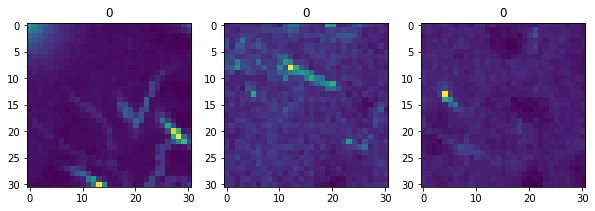

<Figure size 432x288 with 0 Axes>

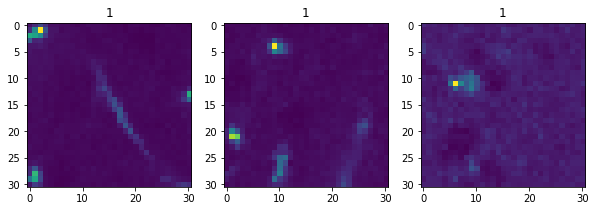

<Figure size 432x288 with 0 Axes>

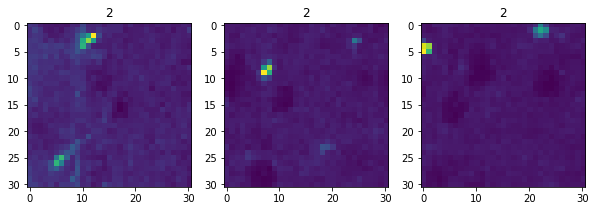

<Figure size 432x288 with 0 Axes>

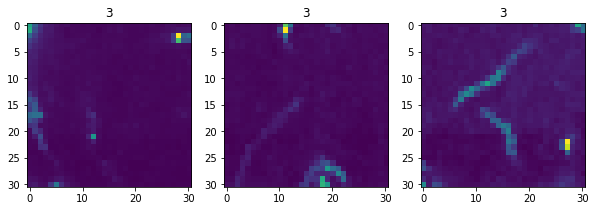

<Figure size 432x288 with 0 Axes>

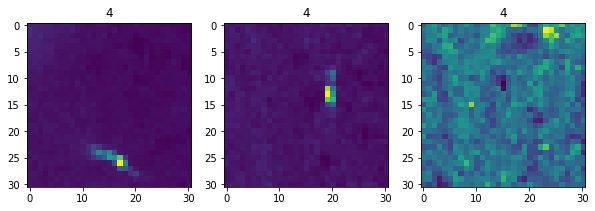

<Figure size 432x288 with 0 Axes>

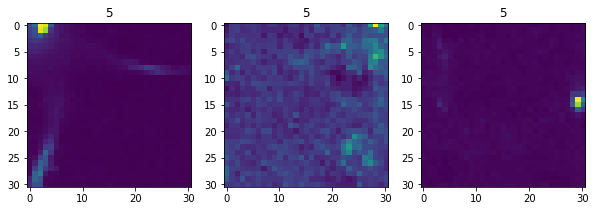

<Figure size 432x288 with 0 Axes>

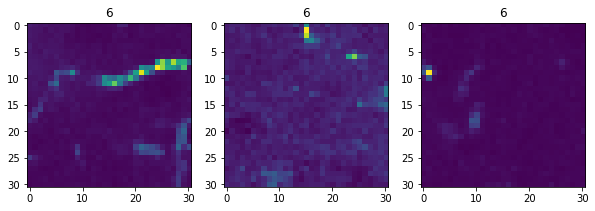

<Figure size 432x288 with 0 Axes>

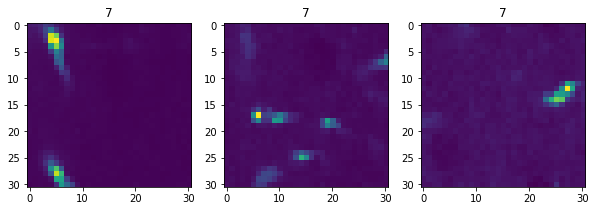

<Figure size 432x288 with 0 Axes>

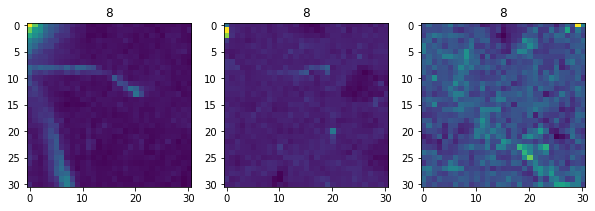

<Figure size 432x288 with 0 Axes>

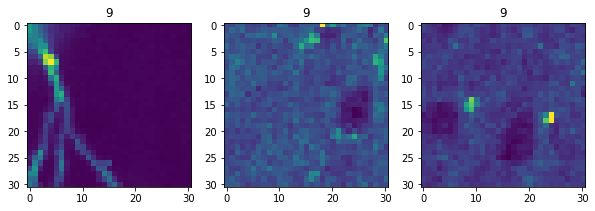

<Figure size 432x288 with 0 Axes>

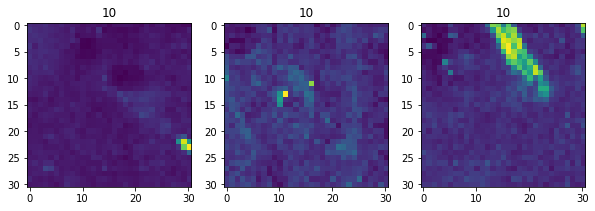

<Figure size 432x288 with 0 Axes>

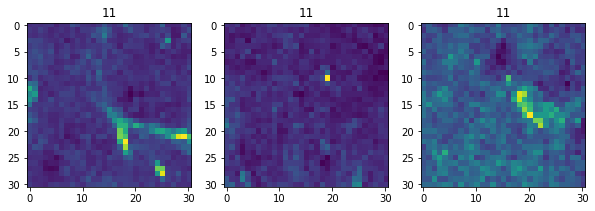

<Figure size 432x288 with 0 Axes>

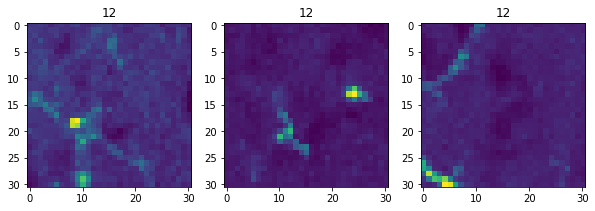

<Figure size 432x288 with 0 Axes>

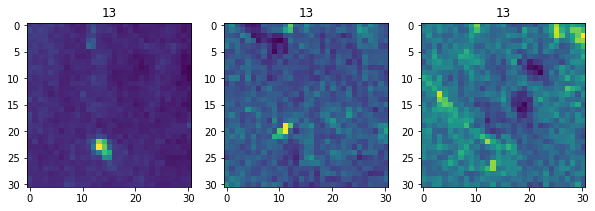

<Figure size 432x288 with 0 Axes>

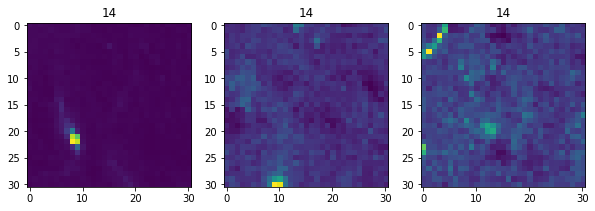

<Figure size 432x288 with 0 Axes>

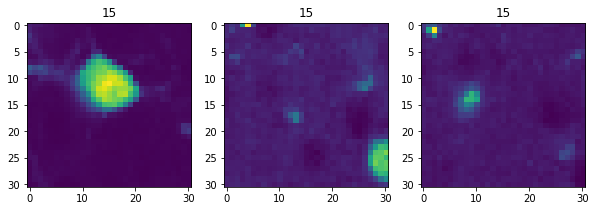

<Figure size 432x288 with 0 Axes>

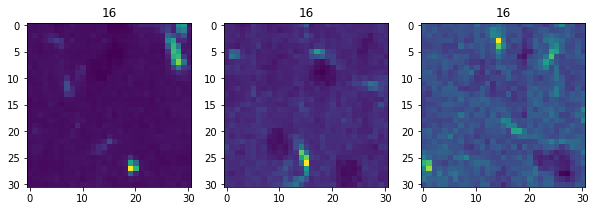

<Figure size 432x288 with 0 Axes>

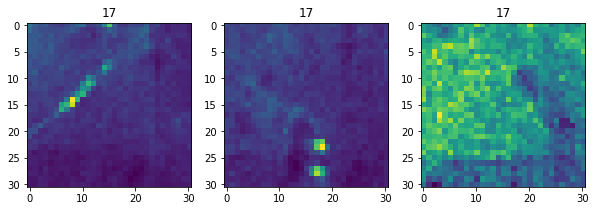

<Figure size 432x288 with 0 Axes>

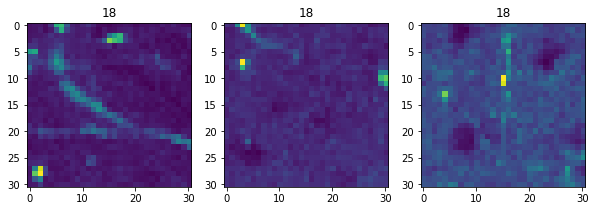

<Figure size 432x288 with 0 Axes>

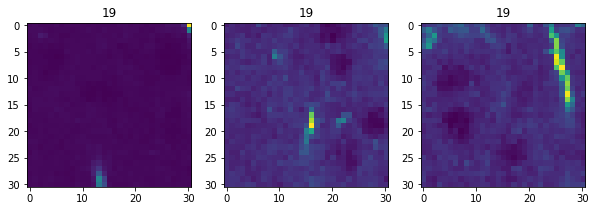

<Figure size 432x288 with 0 Axes>

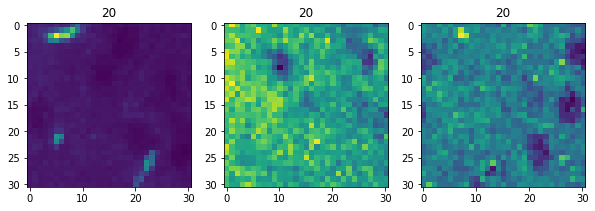

<Figure size 432x288 with 0 Axes>

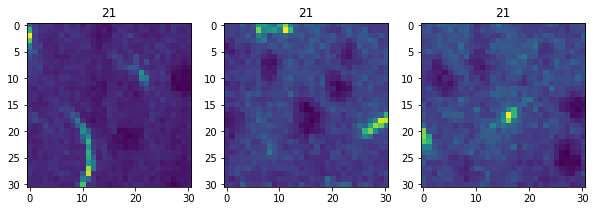

<Figure size 432x288 with 0 Axes>

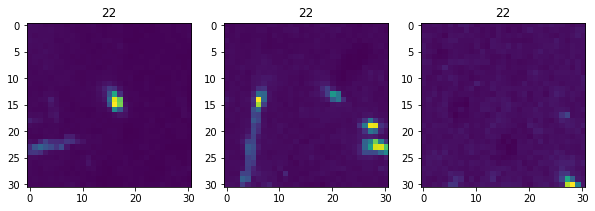

<Figure size 432x288 with 0 Axes>

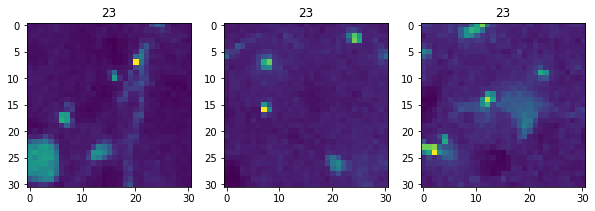

<Figure size 432x288 with 0 Axes>

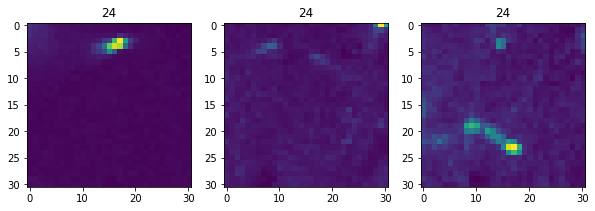

<Figure size 432x288 with 0 Axes>

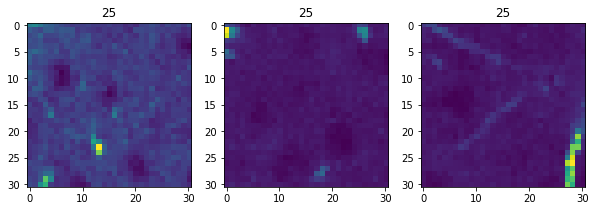

<Figure size 432x288 with 0 Axes>

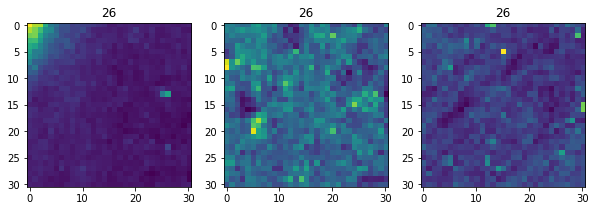

<Figure size 432x288 with 0 Axes>

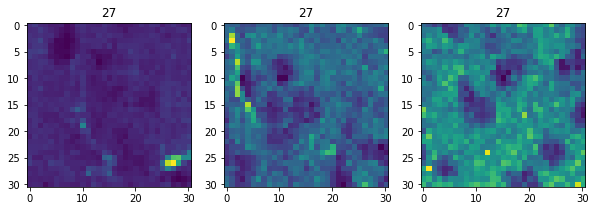

<Figure size 432x288 with 0 Axes>

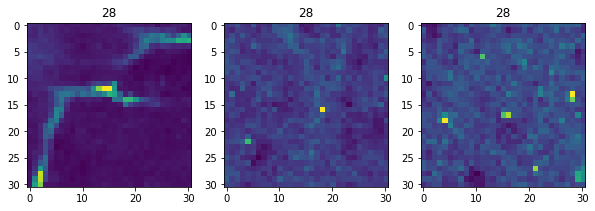

<Figure size 432x288 with 0 Axes>

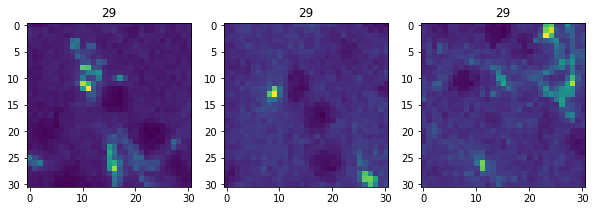

<Figure size 432x288 with 0 Axes>

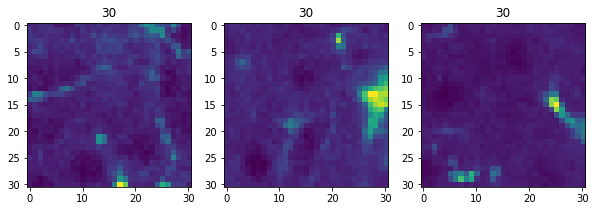

<Figure size 432x288 with 0 Axes>

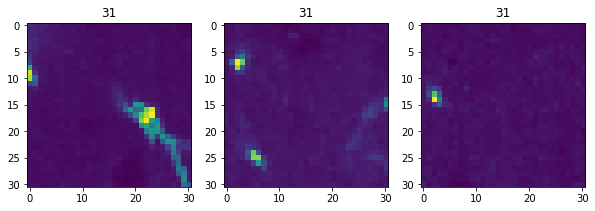

<Figure size 432x288 with 0 Axes>

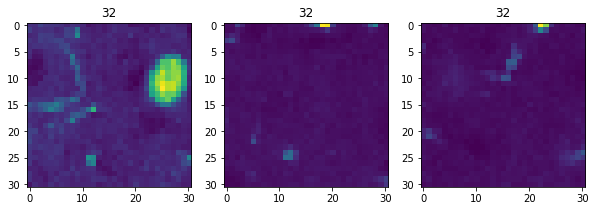

<Figure size 432x288 with 0 Axes>

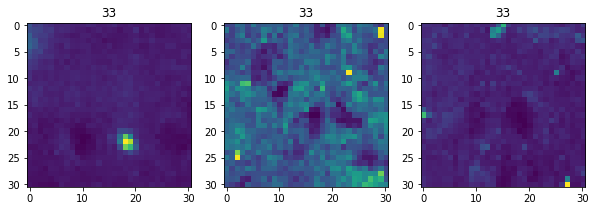

<Figure size 432x288 with 0 Axes>

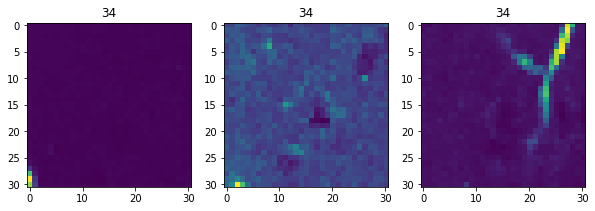

<Figure size 432x288 with 0 Axes>

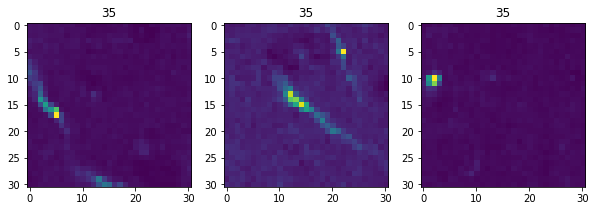

<Figure size 432x288 with 0 Axes>

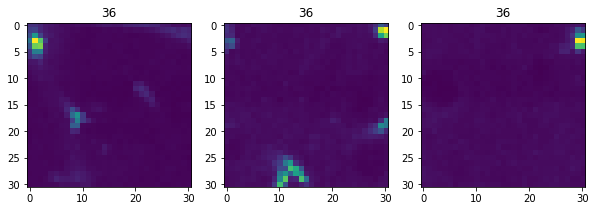

<Figure size 432x288 with 0 Axes>

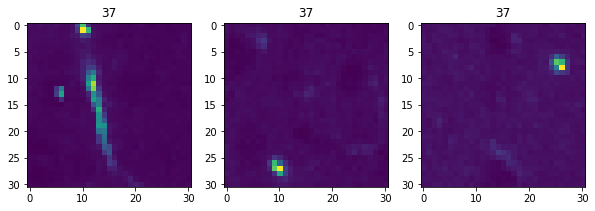

<Figure size 432x288 with 0 Axes>

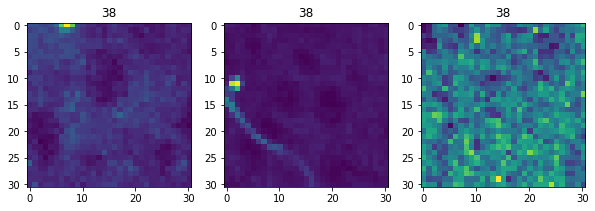

<Figure size 432x288 with 0 Axes>

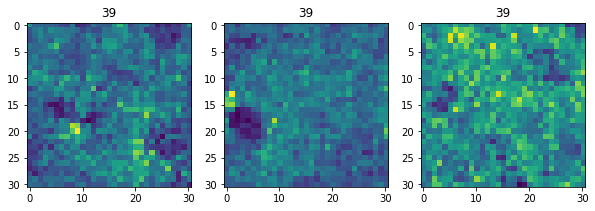

<Figure size 432x288 with 0 Axes>

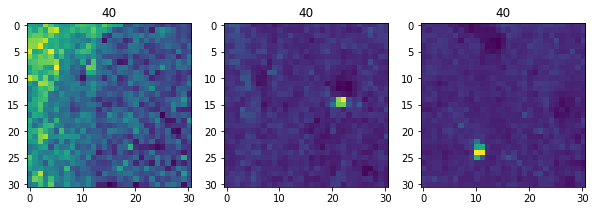

<Figure size 432x288 with 0 Axes>

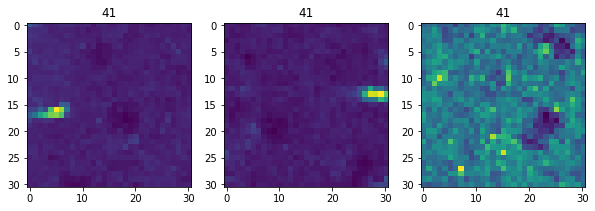

<Figure size 432x288 with 0 Axes>

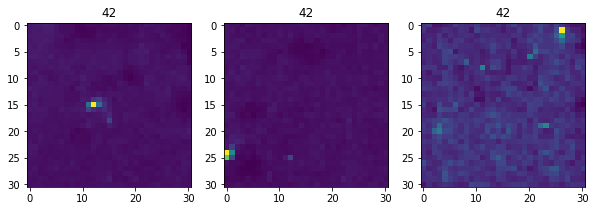

<Figure size 432x288 with 0 Axes>

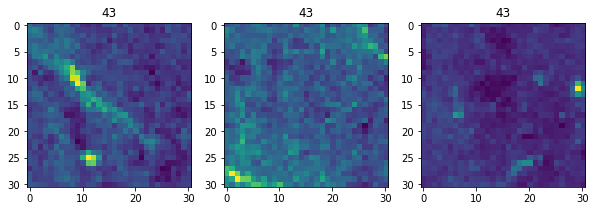

<Figure size 432x288 with 0 Axes>

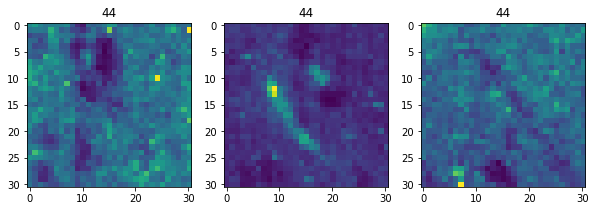

<Figure size 432x288 with 0 Axes>

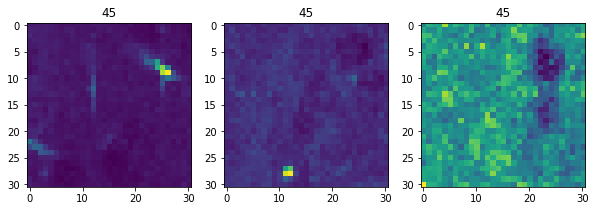

<Figure size 432x288 with 0 Axes>

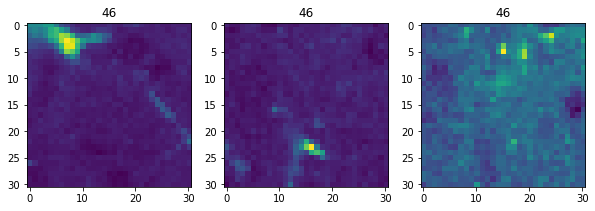

<Figure size 432x288 with 0 Axes>

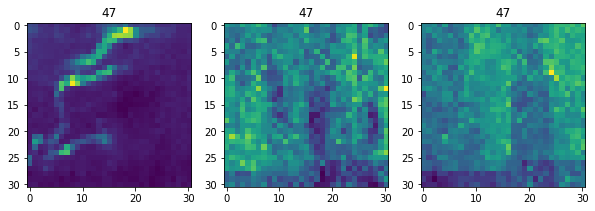

<Figure size 432x288 with 0 Axes>

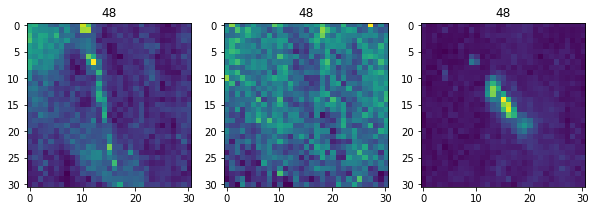

<Figure size 432x288 with 0 Axes>

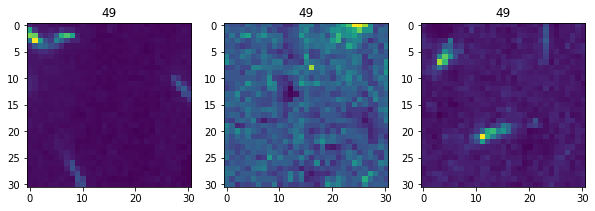

<Figure size 432x288 with 0 Axes>

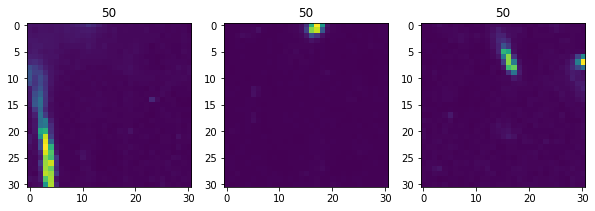

<Figure size 432x288 with 0 Axes>

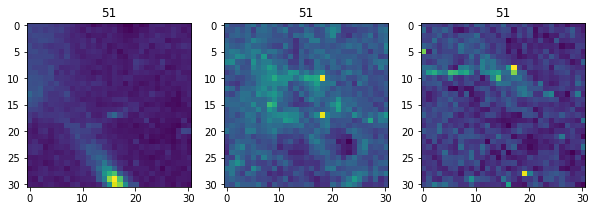

<Figure size 432x288 with 0 Axes>

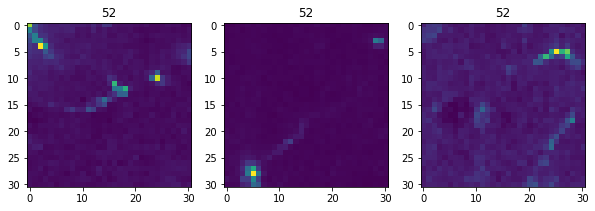

<Figure size 432x288 with 0 Axes>

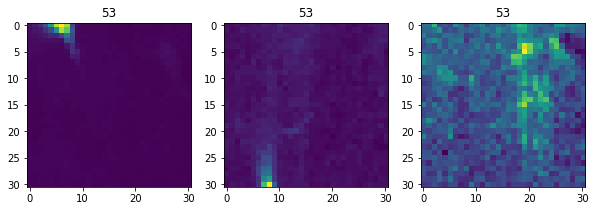

<Figure size 432x288 with 0 Axes>

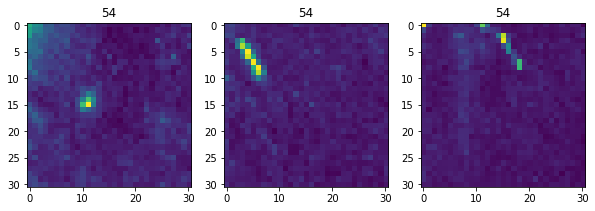

<Figure size 432x288 with 0 Axes>

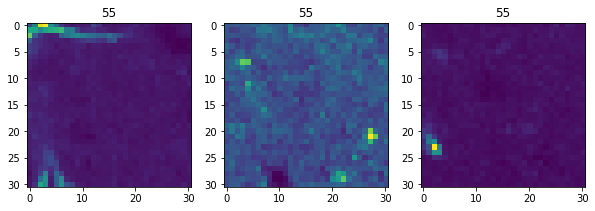

<Figure size 432x288 with 0 Axes>

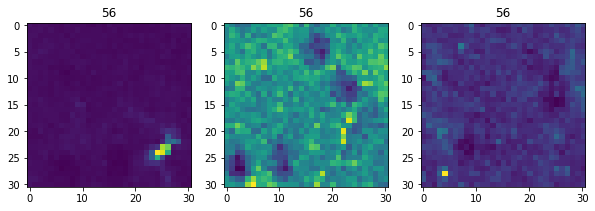

<Figure size 432x288 with 0 Axes>

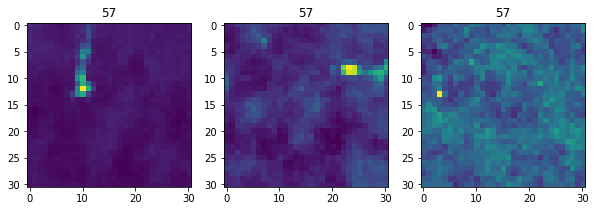

<Figure size 432x288 with 0 Axes>

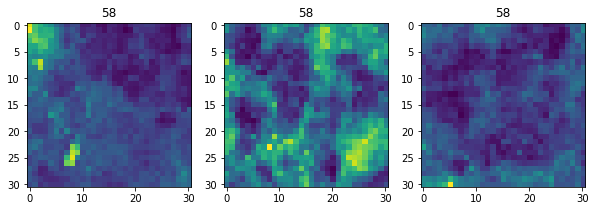

<Figure size 432x288 with 0 Axes>

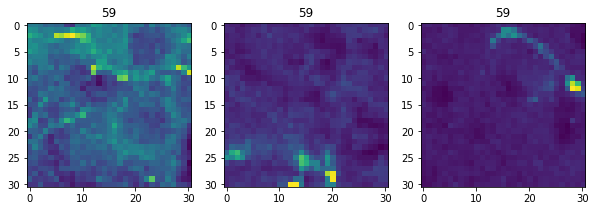

<Figure size 432x288 with 0 Axes>

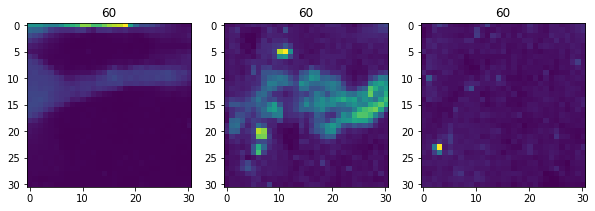

<Figure size 432x288 with 0 Axes>

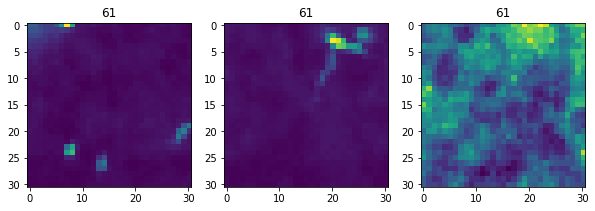

<Figure size 432x288 with 0 Axes>

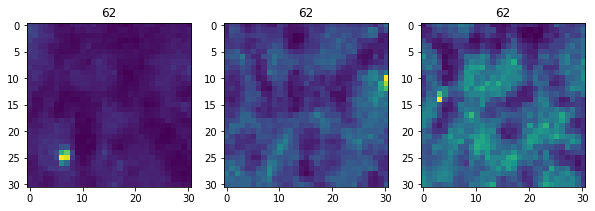

<Figure size 432x288 with 0 Axes>

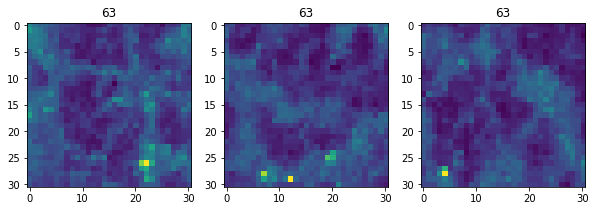

<Figure size 432x288 with 0 Axes>

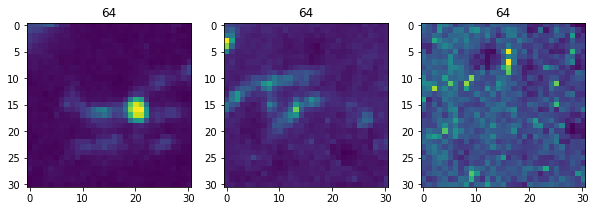

<Figure size 432x288 with 0 Axes>

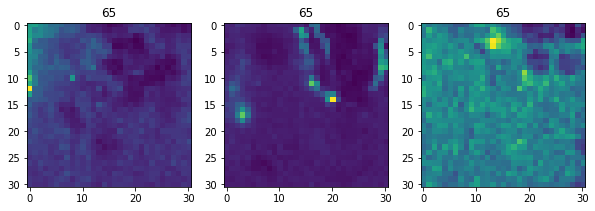

<Figure size 432x288 with 0 Axes>

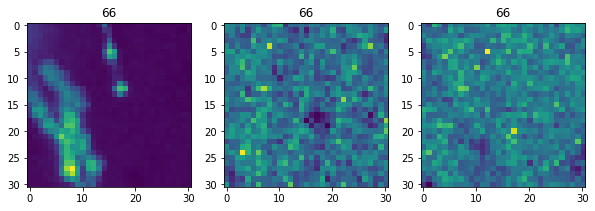

<Figure size 432x288 with 0 Axes>

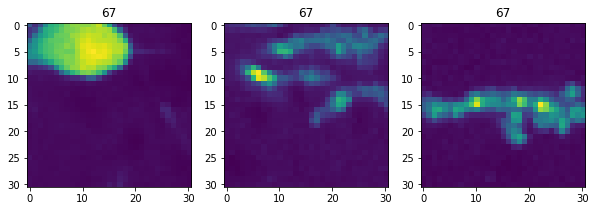

<Figure size 432x288 with 0 Axes>

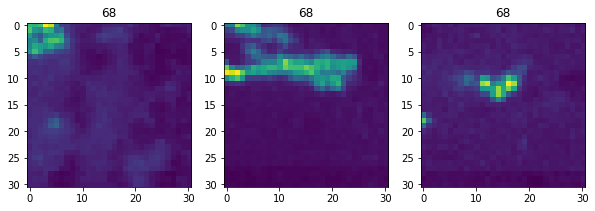

<Figure size 432x288 with 0 Axes>

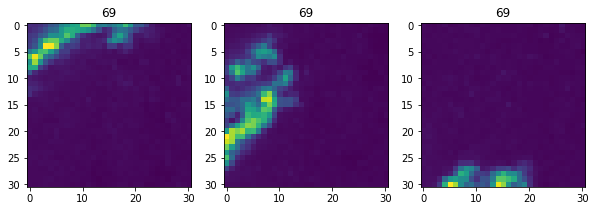

<Figure size 432x288 with 0 Axes>

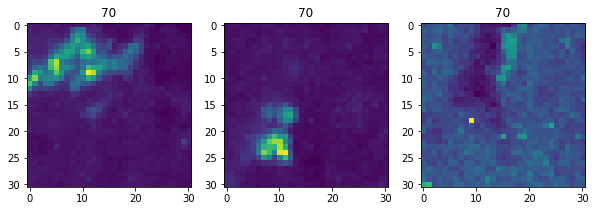

<Figure size 432x288 with 0 Axes>

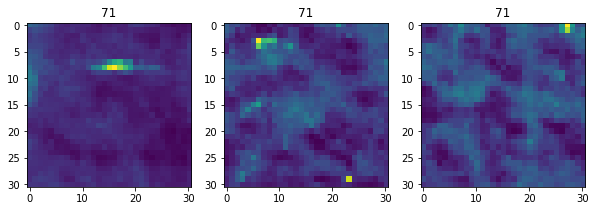

<Figure size 432x288 with 0 Axes>

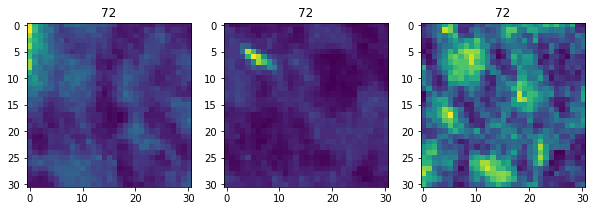

<Figure size 432x288 with 0 Axes>

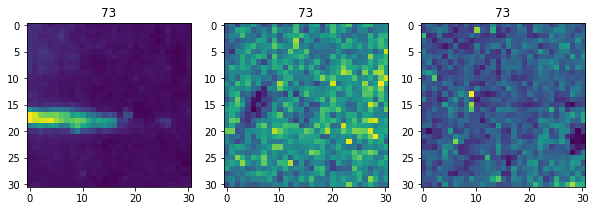

<Figure size 432x288 with 0 Axes>

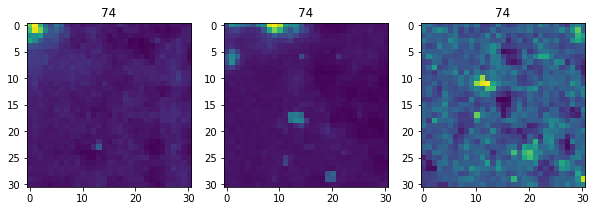

<Figure size 432x288 with 0 Axes>

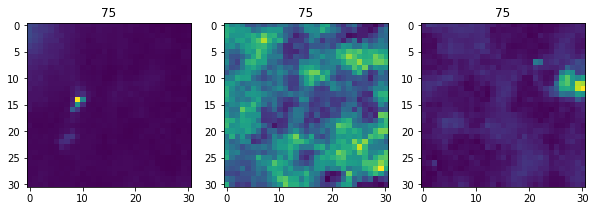

<Figure size 432x288 with 0 Axes>

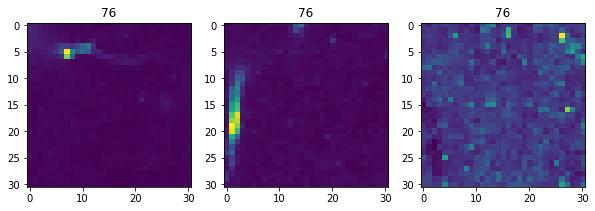

<Figure size 432x288 with 0 Axes>

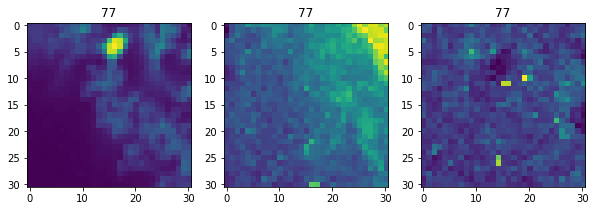

<Figure size 432x288 with 0 Axes>

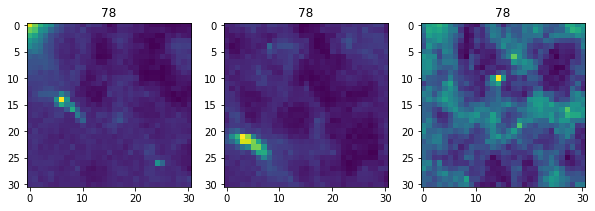

<Figure size 432x288 with 0 Axes>

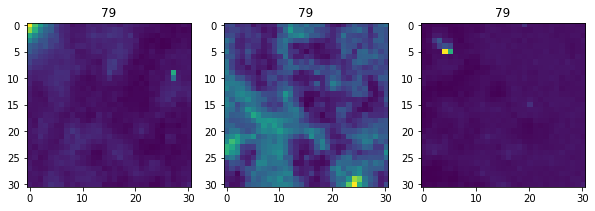

<Figure size 432x288 with 0 Axes>

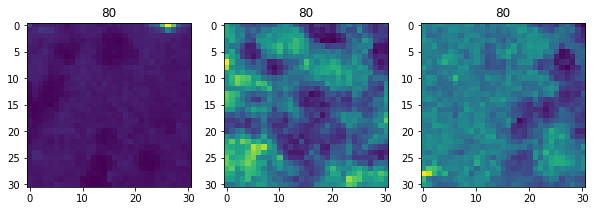

<Figure size 432x288 with 0 Axes>

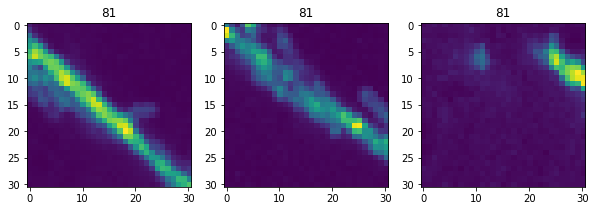

<Figure size 432x288 with 0 Axes>

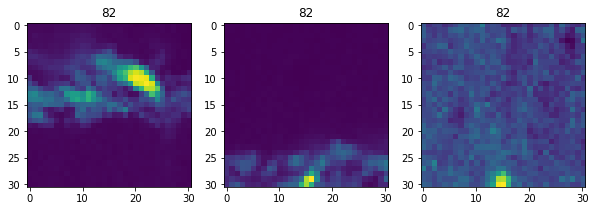

<Figure size 432x288 with 0 Axes>

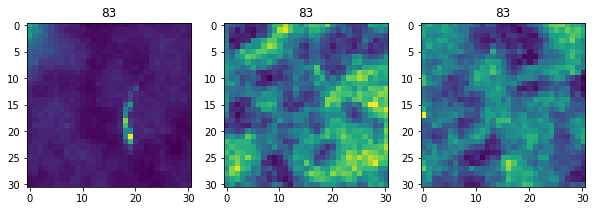

<Figure size 432x288 with 0 Axes>

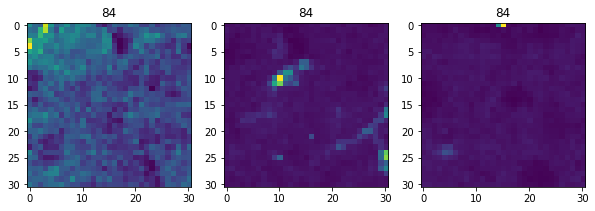

<Figure size 432x288 with 0 Axes>

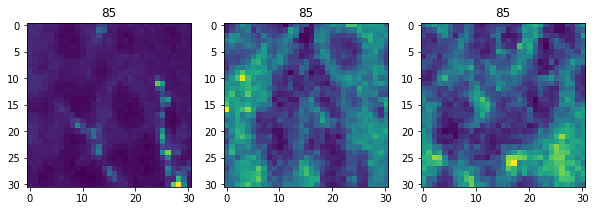

<Figure size 432x288 with 0 Axes>

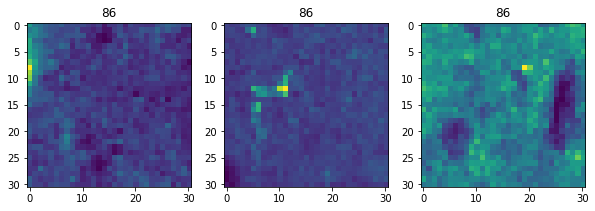

<Figure size 432x288 with 0 Axes>

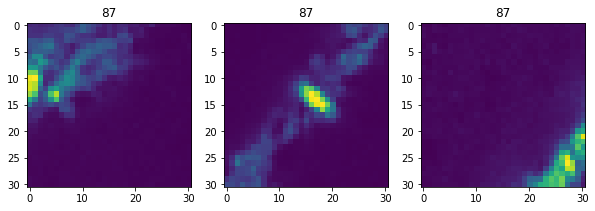

<Figure size 432x288 with 0 Axes>

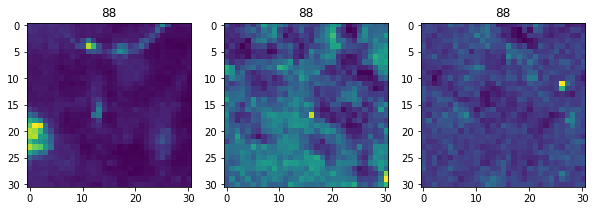

<Figure size 432x288 with 0 Axes>

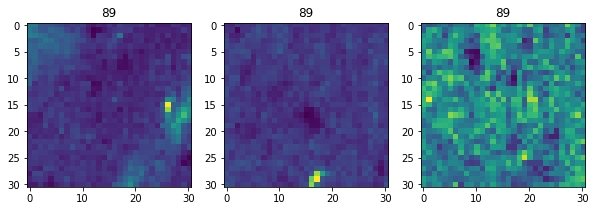

<Figure size 432x288 with 0 Axes>

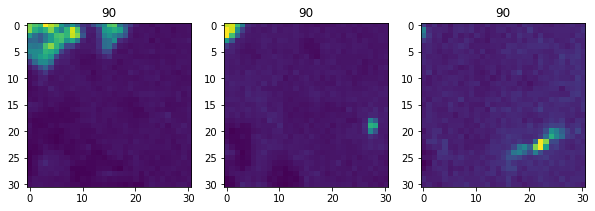

<Figure size 432x288 with 0 Axes>

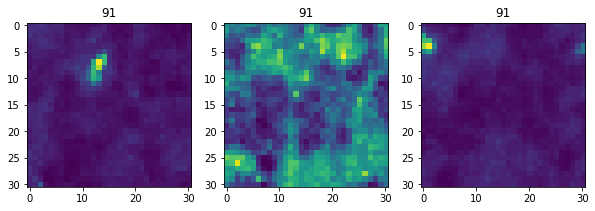

<Figure size 432x288 with 0 Axes>

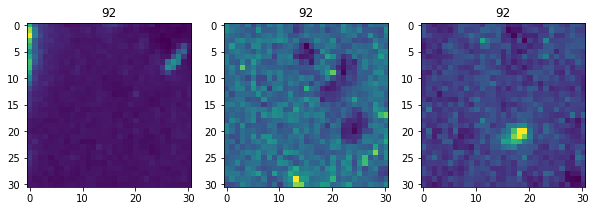

<Figure size 432x288 with 0 Axes>

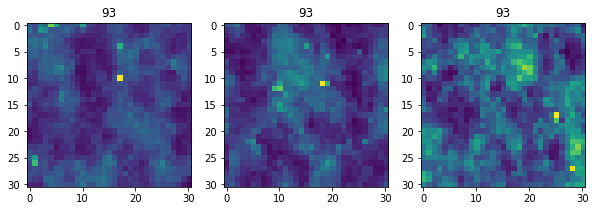

<Figure size 432x288 with 0 Axes>

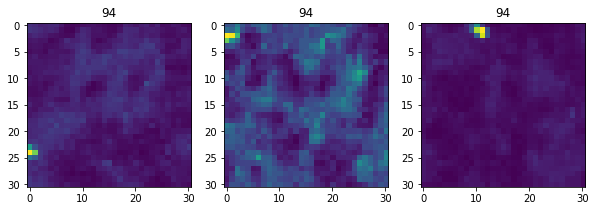

<Figure size 432x288 with 0 Axes>

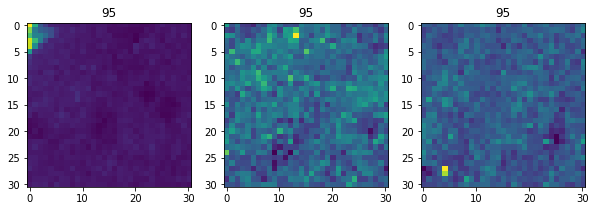

<Figure size 432x288 with 0 Axes>

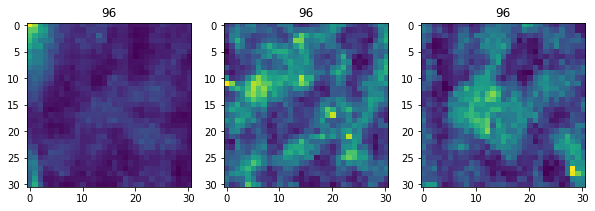

<Figure size 432x288 with 0 Axes>

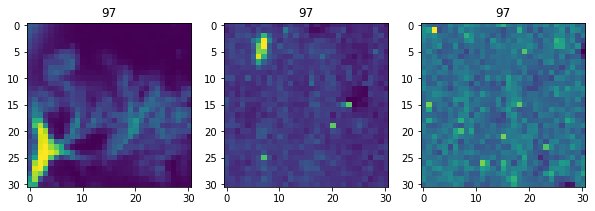

<Figure size 432x288 with 0 Axes>

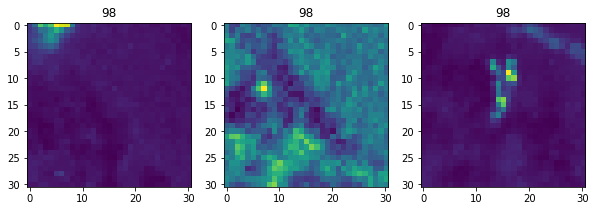

<Figure size 432x288 with 0 Axes>

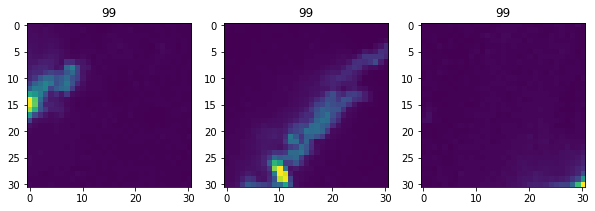

<Figure size 432x288 with 0 Axes>

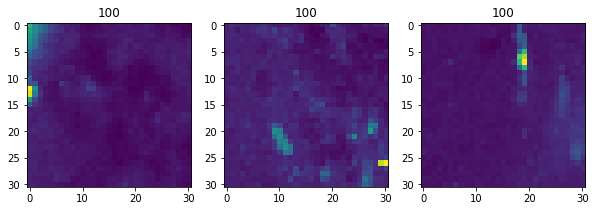

<Figure size 432x288 with 0 Axes>

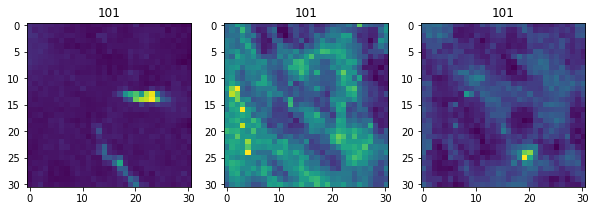

<Figure size 432x288 with 0 Axes>

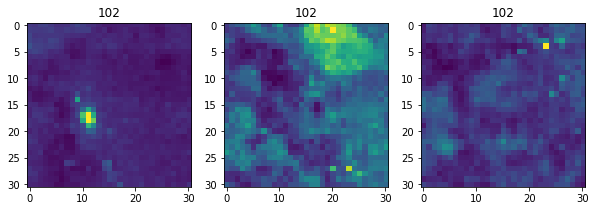

<Figure size 432x288 with 0 Axes>

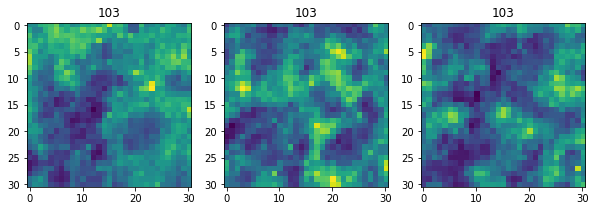

<Figure size 432x288 with 0 Axes>

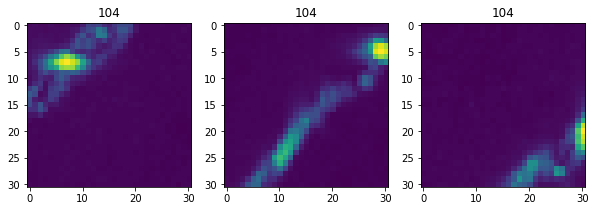

<Figure size 432x288 with 0 Axes>

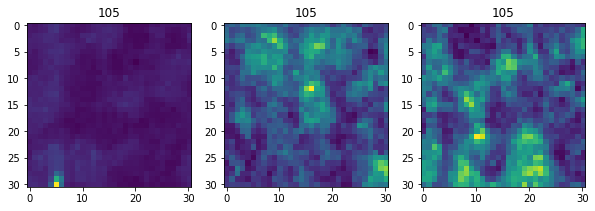

<Figure size 432x288 with 0 Axes>

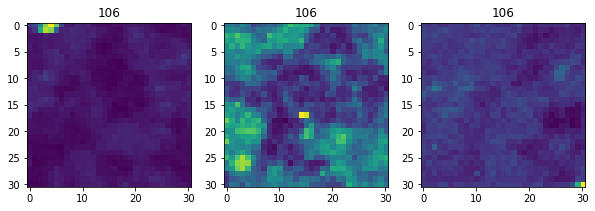

<Figure size 432x288 with 0 Axes>

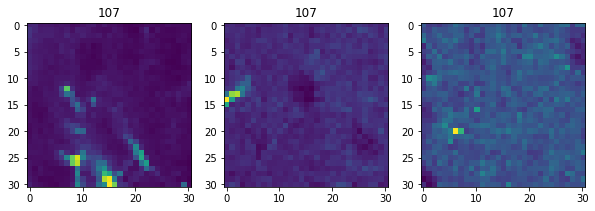

<Figure size 432x288 with 0 Axes>

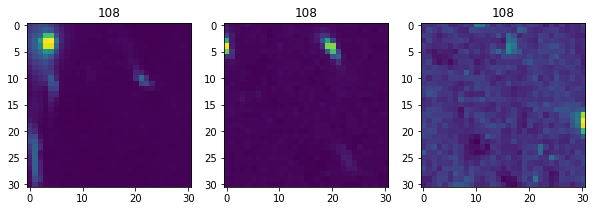

<Figure size 432x288 with 0 Axes>

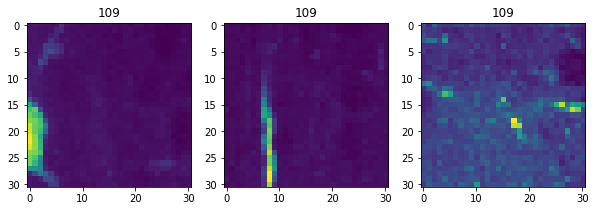

<Figure size 432x288 with 0 Axes>

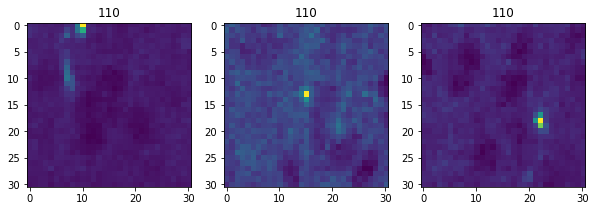

<Figure size 432x288 with 0 Axes>

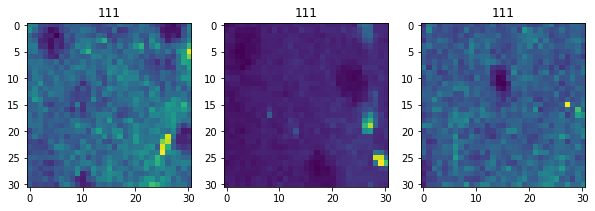

<Figure size 432x288 with 0 Axes>

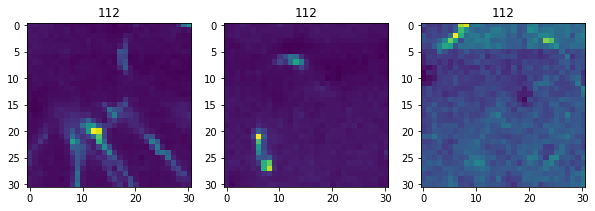

<Figure size 432x288 with 0 Axes>

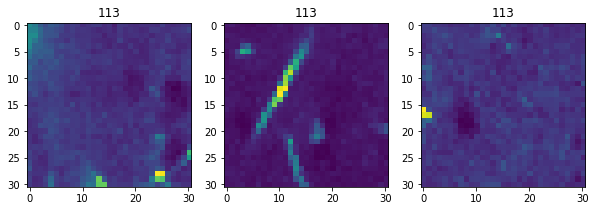

<Figure size 432x288 with 0 Axes>

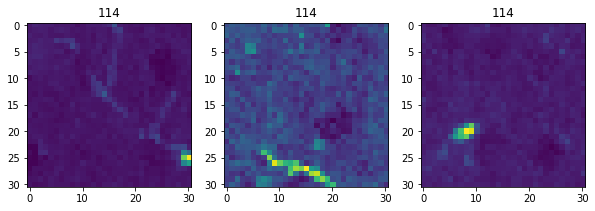

<Figure size 432x288 with 0 Axes>

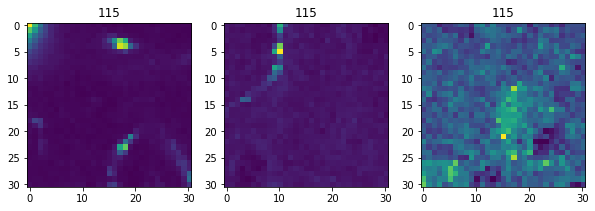

<Figure size 432x288 with 0 Axes>

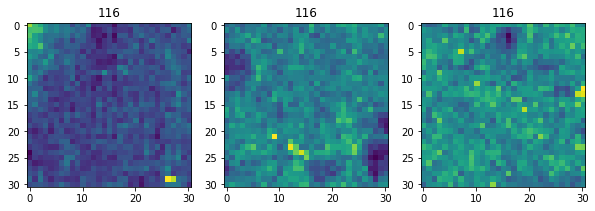

<Figure size 432x288 with 0 Axes>

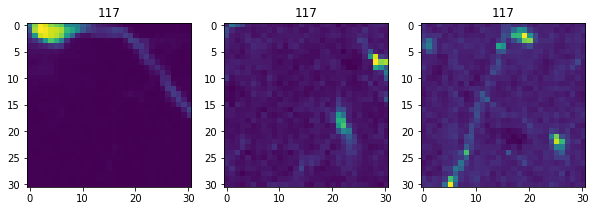

<Figure size 432x288 with 0 Axes>

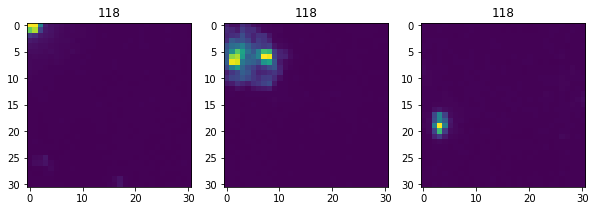

<Figure size 432x288 with 0 Axes>

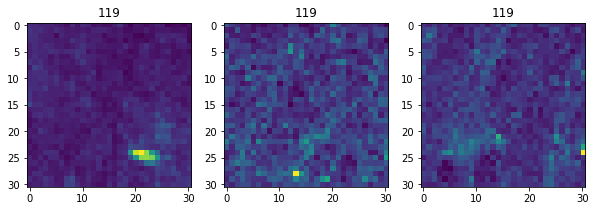

<Figure size 432x288 with 0 Axes>

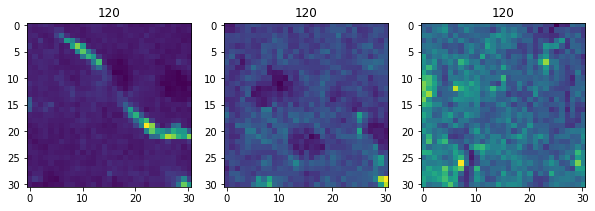

<Figure size 432x288 with 0 Axes>

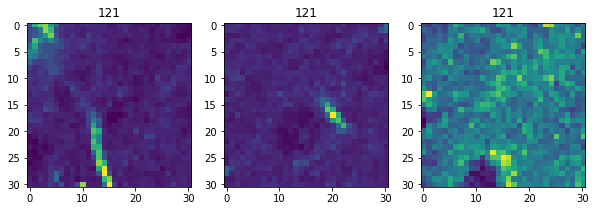

<Figure size 432x288 with 0 Axes>

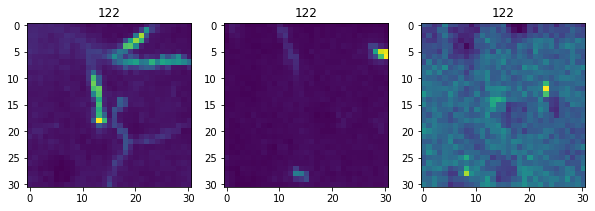

<Figure size 432x288 with 0 Axes>

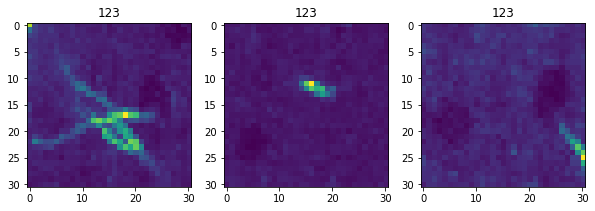

<Figure size 432x288 with 0 Axes>

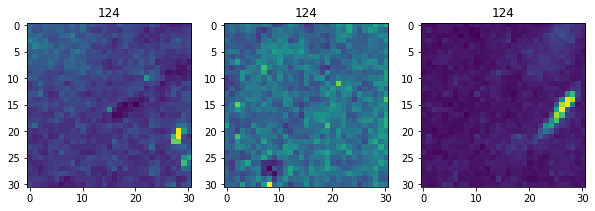

<Figure size 432x288 with 0 Axes>

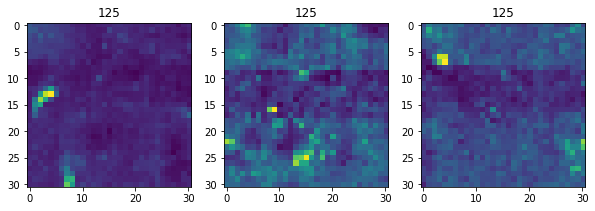

<Figure size 432x288 with 0 Axes>

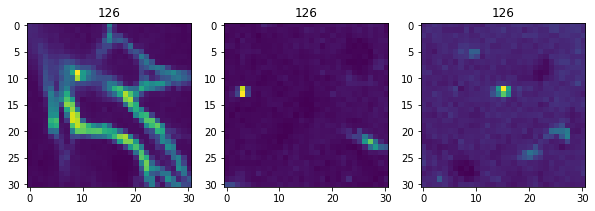

<Figure size 432x288 with 0 Axes>

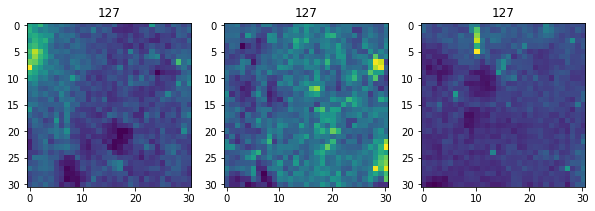

<Figure size 432x288 with 0 Axes>

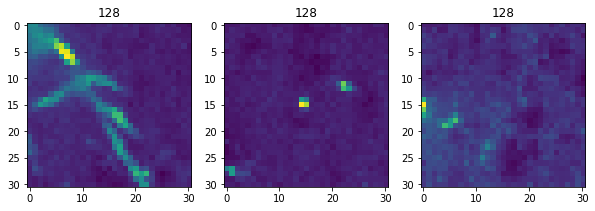

<Figure size 432x288 with 0 Axes>

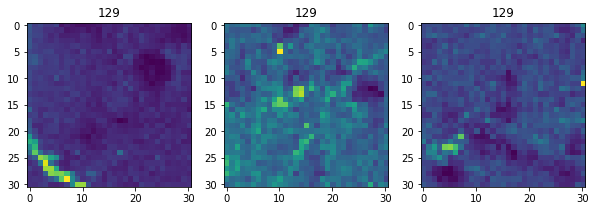

<Figure size 432x288 with 0 Axes>

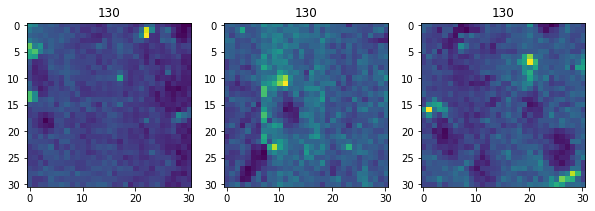

<Figure size 432x288 with 0 Axes>

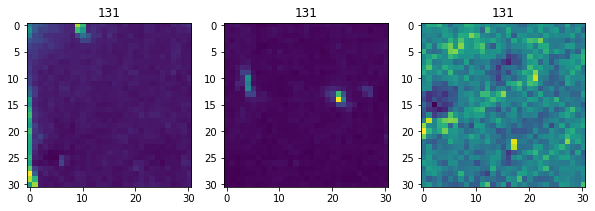

<Figure size 432x288 with 0 Axes>

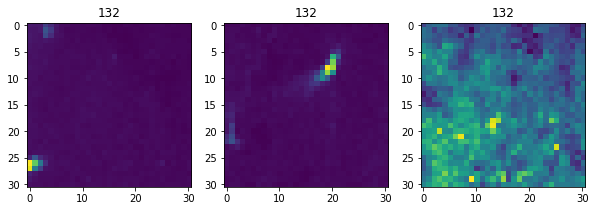

<Figure size 432x288 with 0 Axes>

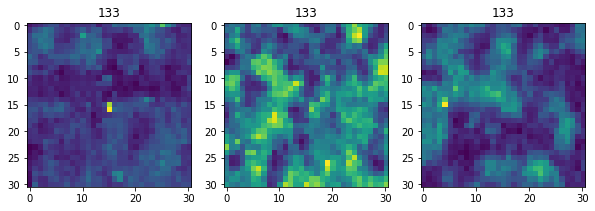

<Figure size 432x288 with 0 Axes>

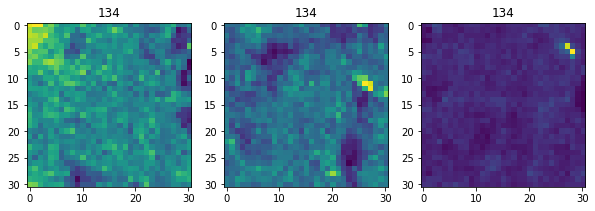

<Figure size 432x288 with 0 Axes>

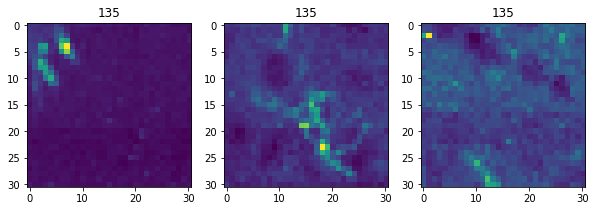

<Figure size 432x288 with 0 Axes>

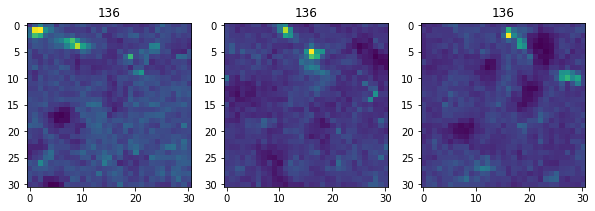

<Figure size 432x288 with 0 Axes>

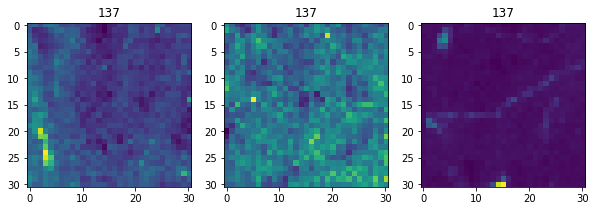

<Figure size 432x288 with 0 Axes>

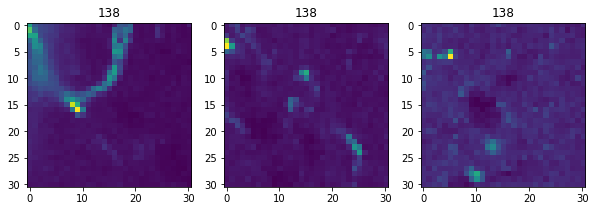

<Figure size 432x288 with 0 Axes>

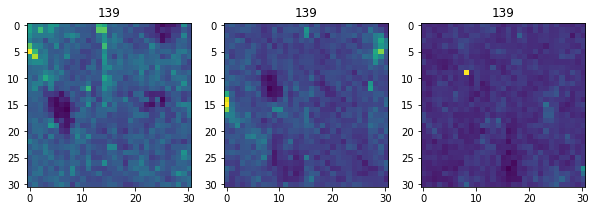

<Figure size 432x288 with 0 Axes>

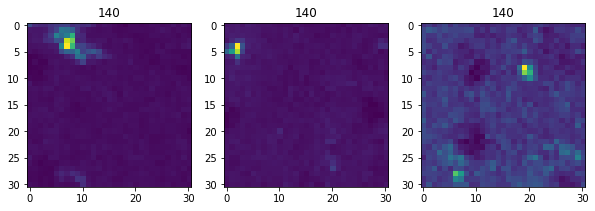

<Figure size 432x288 with 0 Axes>

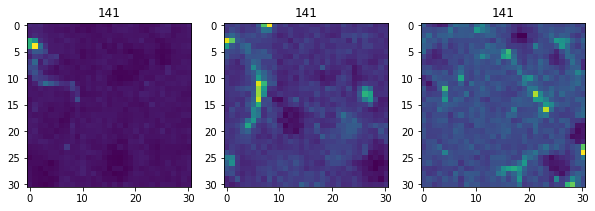

<Figure size 432x288 with 0 Axes>

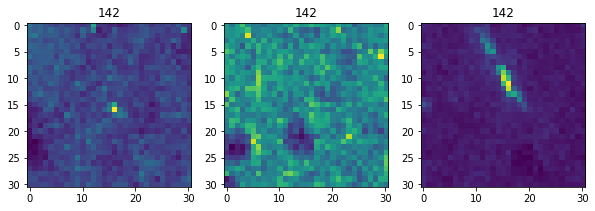

<Figure size 432x288 with 0 Axes>

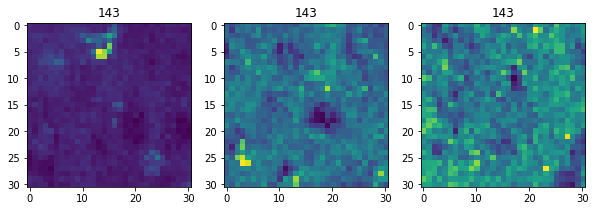

<Figure size 432x288 with 0 Axes>

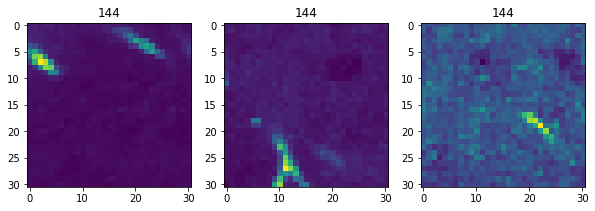

<Figure size 432x288 with 0 Axes>

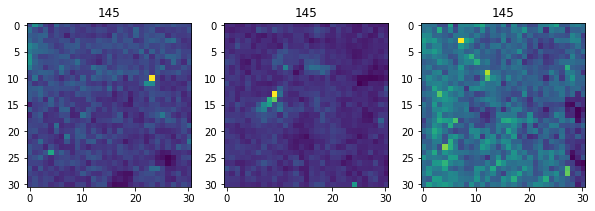

<Figure size 432x288 with 0 Axes>

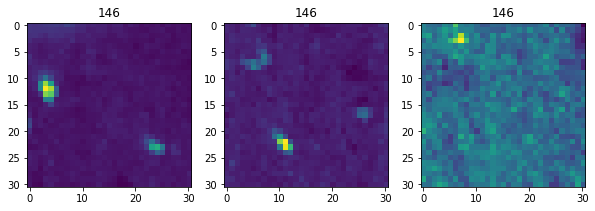

<Figure size 432x288 with 0 Axes>

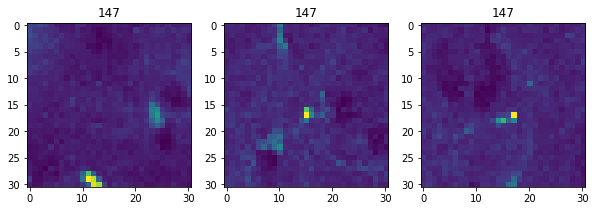

<Figure size 432x288 with 0 Axes>

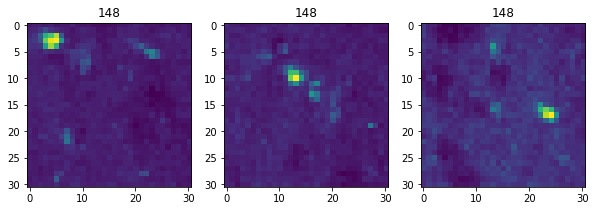

<Figure size 432x288 with 0 Axes>

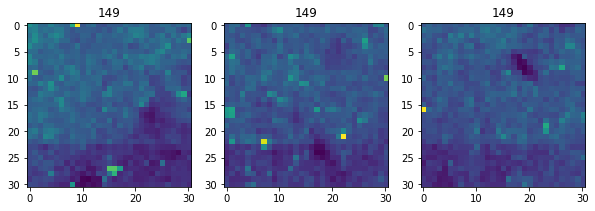

<Figure size 432x288 with 0 Axes>

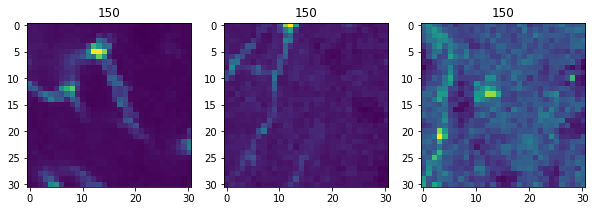

<Figure size 432x288 with 0 Axes>

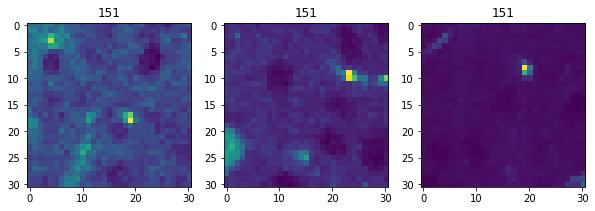

<Figure size 432x288 with 0 Axes>

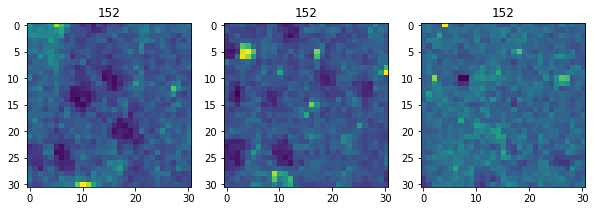

<Figure size 432x288 with 0 Axes>

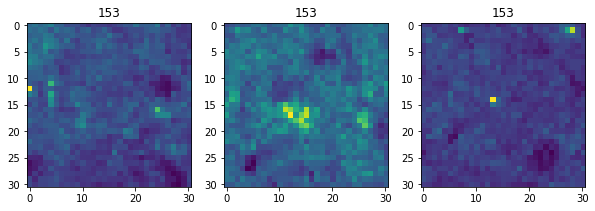

<Figure size 432x288 with 0 Axes>

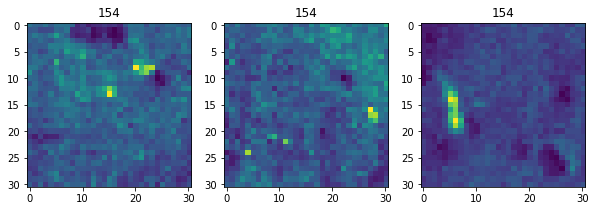

<Figure size 432x288 with 0 Axes>

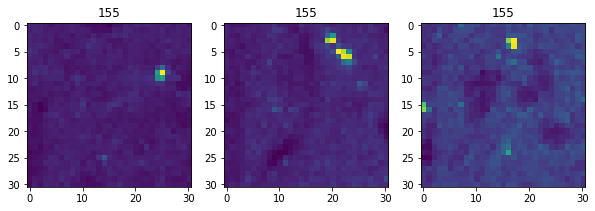

<Figure size 432x288 with 0 Axes>

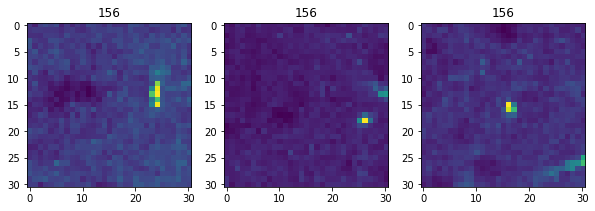

<Figure size 432x288 with 0 Axes>

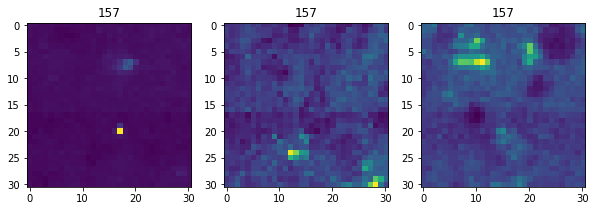

<Figure size 432x288 with 0 Axes>

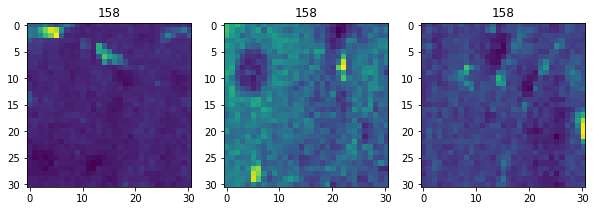

<Figure size 432x288 with 0 Axes>

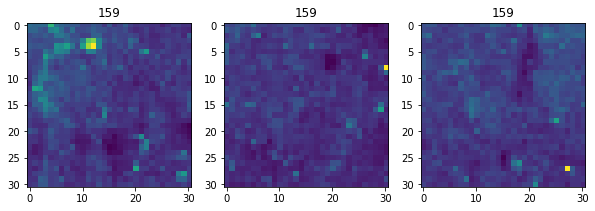

<Figure size 432x288 with 0 Axes>

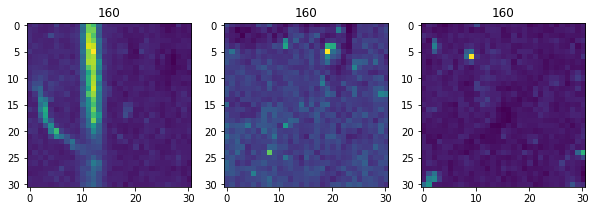

<Figure size 432x288 with 0 Axes>

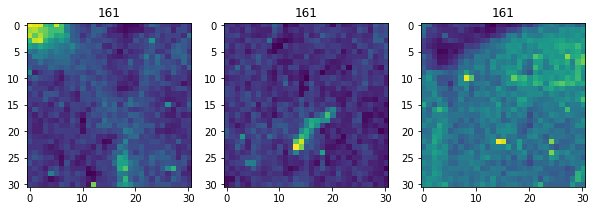

<Figure size 432x288 with 0 Axes>

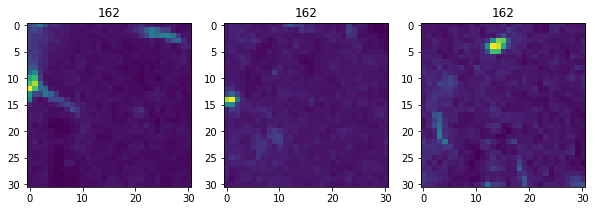

<Figure size 432x288 with 0 Axes>

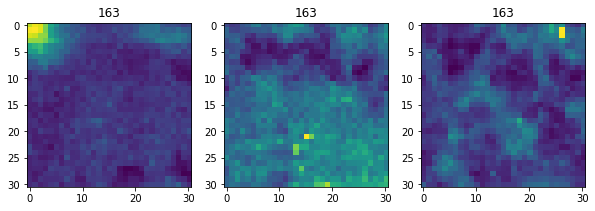

<Figure size 432x288 with 0 Axes>

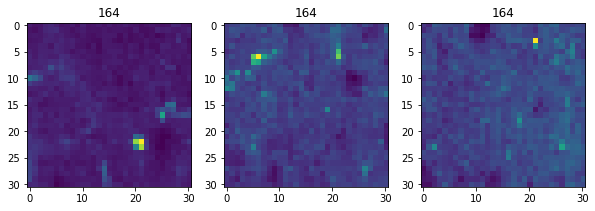

<Figure size 432x288 with 0 Axes>

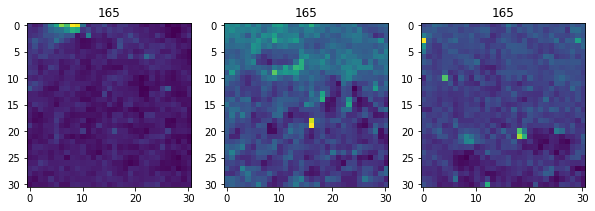

<Figure size 432x288 with 0 Axes>

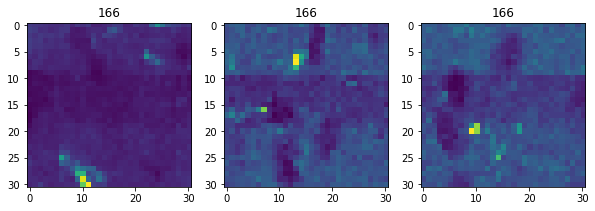

<Figure size 432x288 with 0 Axes>

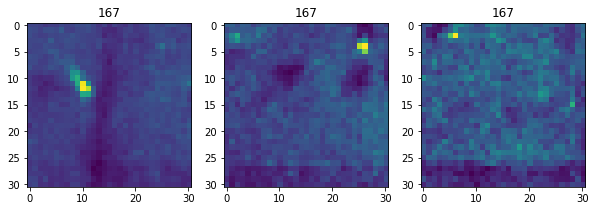

<Figure size 432x288 with 0 Axes>

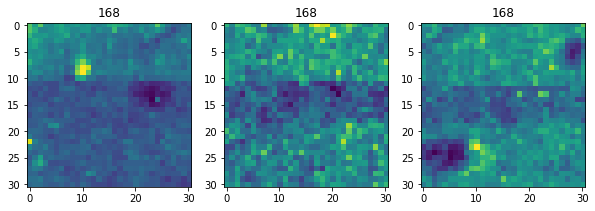

<Figure size 432x288 with 0 Axes>

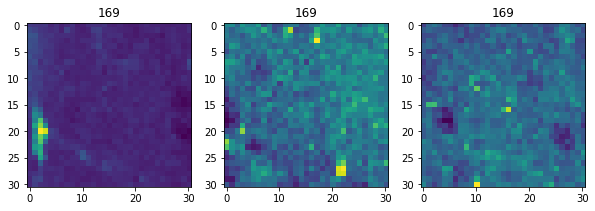

<Figure size 432x288 with 0 Axes>

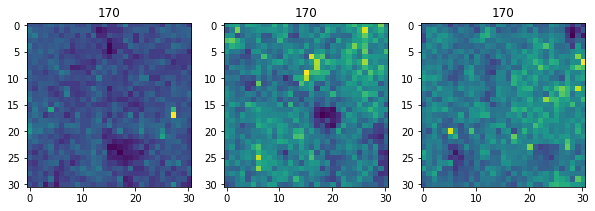

<Figure size 432x288 with 0 Axes>

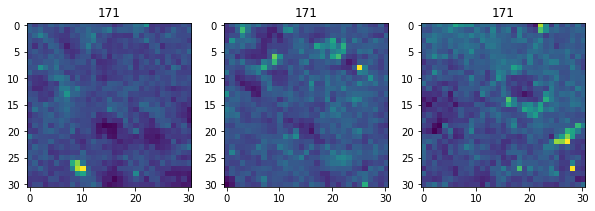

<Figure size 432x288 with 0 Axes>

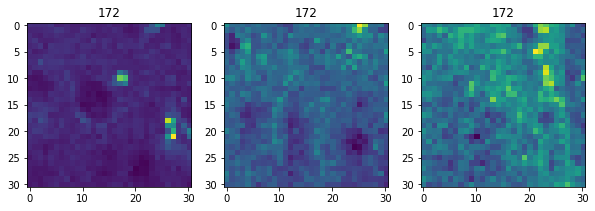

<Figure size 432x288 with 0 Axes>

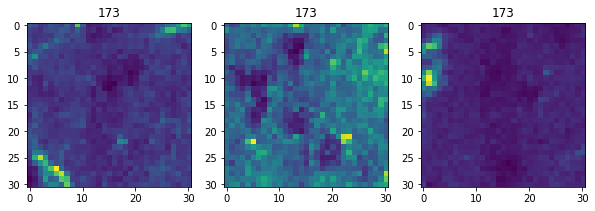

<Figure size 432x288 with 0 Axes>

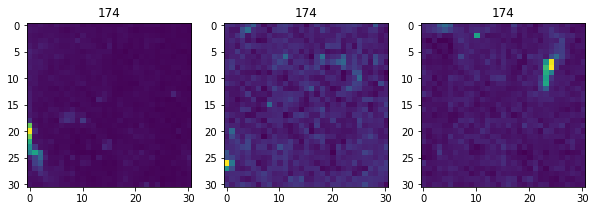

<Figure size 432x288 with 0 Axes>

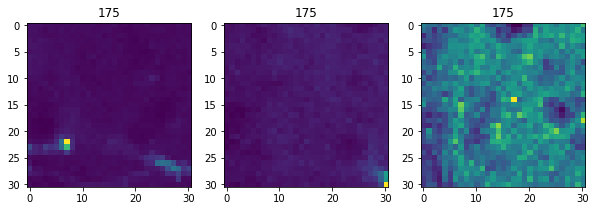

<Figure size 432x288 with 0 Axes>

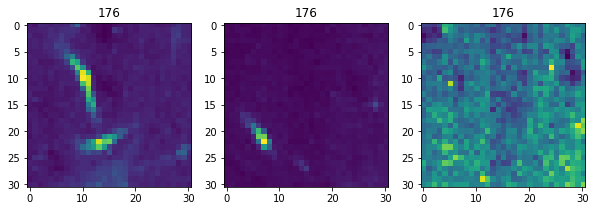

<Figure size 432x288 with 0 Axes>

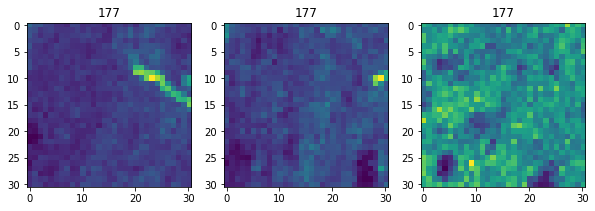

<Figure size 432x288 with 0 Axes>

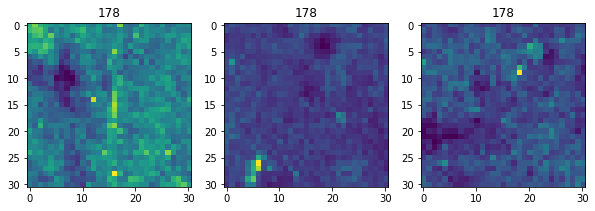

<Figure size 432x288 with 0 Axes>

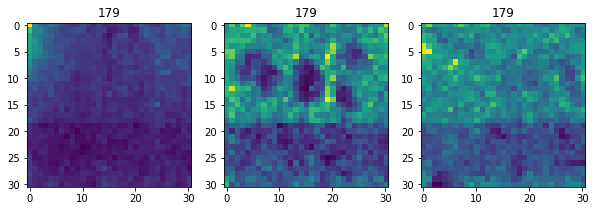

In [60]:
for i in range(len(NCR_imgs)):
    fig = plt.figure()
    f, axarr = plt.subplots(1,3, figsize=(10,10) ) 
    axarr[0].set_title(i); axarr[1].set_title(i); axarr[2].set_title(i)

    axarr[0].imshow(NCR_imgs[i][:,:,5])
    axarr[1].imshow(NCR_imgs[i][:,:,15])
    axarr[2].imshow(NCR_imgs[i][:,:,25])


## Remove any volumes that obviously include a cell body (values will change per dataset)

In [56]:
#  Change these values depending on the dataset
for i in [15, 66, 107, 114]:
    NCR_imgs.pop(i)
    
    

In [61]:
np.save('NCR_all_bias_corrected.npy', NCR_imgs)


